In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

**The "loan_status" column contains our label. **

In [2]:
df = pd.read_csv('/content/Lending_Club_Data_1.csv')
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df_info = pd.read_csv('/content/Lending_Club_Data.csv')
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28325 entries, 0 to 28324
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            28325 non-null  int64  
 1   loan_amnt             28325 non-null  float64
 2   term                  28325 non-null  object 
 3   int_rate              28325 non-null  float64
 4   installment           28325 non-null  float64
 5   grade                 28325 non-null  object 
 6   sub_grade             28325 non-null  object 
 7   emp_title             26715 non-null  object 
 8   emp_length            27025 non-null  object 
 9   home_ownership        28324 non-null  object 
 10  annual_inc            28324 non-null  float64
 11  verification_status   28324 non-null  object 
 12  issue_d               28324 non-null  object 
 13  loan_status           28324 non-null  object 
 14  purpose               28324 non-null  object 
 15  title              

In [6]:
df.describe()

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,28325.000000,28325.000000,28325.000000,28325.000000,2.832400e+04,28324.000000,28324.000000,28324.000000,28324.000000,28306.000000,28324.000000,25708.000000,28282.000000
mean,14162.000000,14094.703442,13.661680,431.592737,7.420208e+04,17.362471,11.278315,0.180518,15801.355529,53.929545,25.358353,1.802941,0.122658
std,8176.867524,8332.860379,4.466129,249.623484,6.304492e+04,8.221869,5.113737,0.513972,19045.709964,24.318294,11.792634,2.131128,0.355865
min,0.000000,500.000000,5.320000,16.310000,2.500000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,7081.000000,8000.000000,10.620000,252.100000,4.500000e+04,11.260000,8.000000,0.000000,6058.750000,36.200000,17.000000,0.000000,0.000000
50%,14162.000000,12000.000000,13.330000,376.440000,6.400000e+04,16.840000,10.000000,0.000000,11202.000000,55.050000,24.000000,1.000000,0.000000
75%,21243.000000,19800.000000,16.490000,565.640000,9.000000e+04,22.980000,14.000000,0.000000,19643.750000,73.000000,32.000000,3.000000,0.000000
max,28324.000000,40000.000000,30.740000,1533.810000,6.100000e+06,189.900000,51.000000,11.000000,605063.000000,129.400000,108.000000,34.000000,5.000000


**Exploratory Data Analysis**

First lets check the label and its distribution.

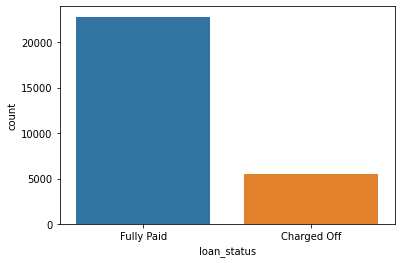

In [7]:
sns.countplot(x = 'loan_status', data = df)

We have a huge class imbalance here. Charged off are the ones who did not pay back the loan. 

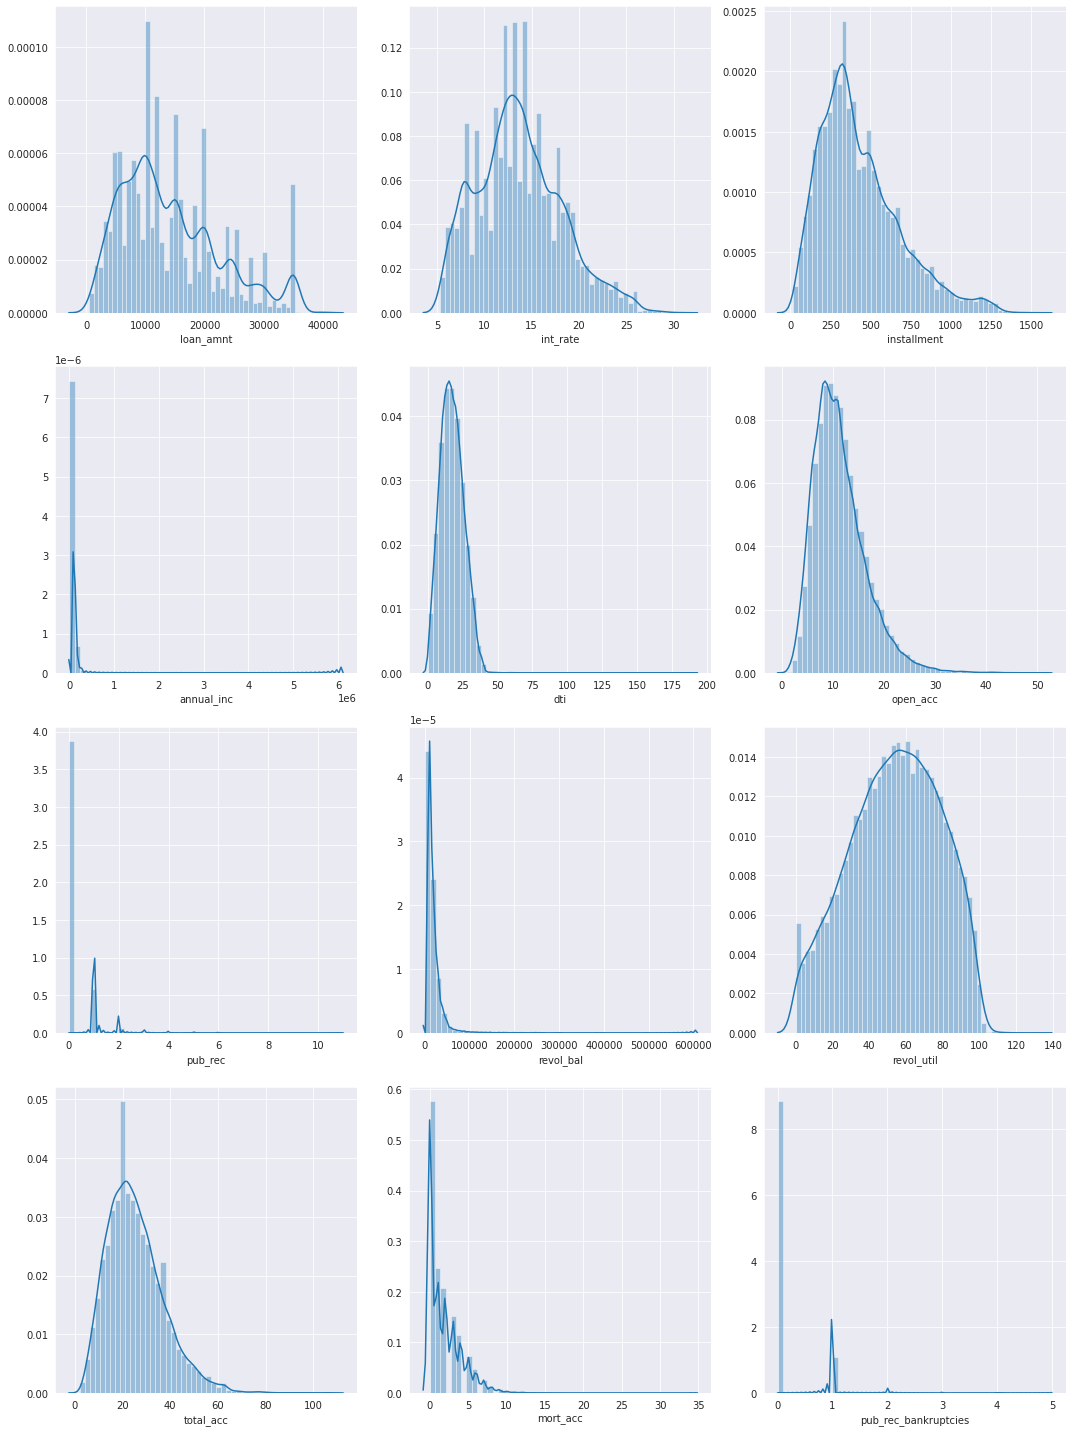

In [9]:
sns.set_style('darkgrid')
cols = ['loan_amnt',	'int_rate',	'installment',	'annual_inc',	'dti',	'open_acc',	'pub_rec', 'revol_bal',	'revol_util',	'total_acc',	'mort_acc',	'pub_rec_bankruptcies']
n_rows = 4
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.distplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

In [13]:
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


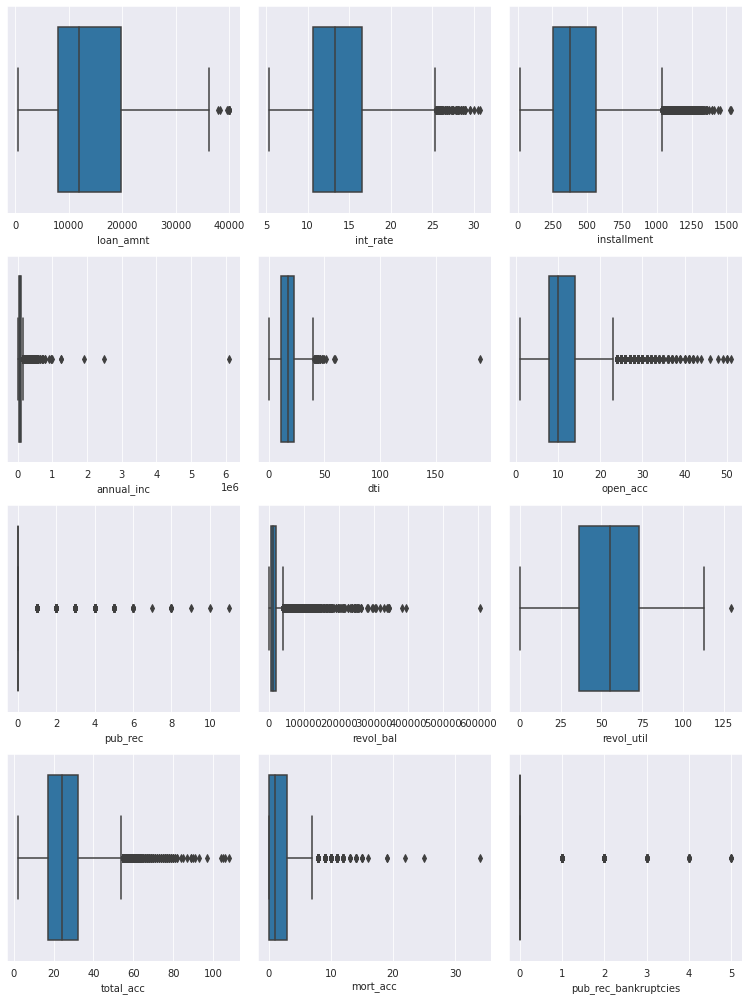

In [14]:
sns.set_style('darkgrid')
cols = ['loan_amnt', 'int_rate', 'installment',
        'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies']
n_rows = 4
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.boxplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

In [19]:
df = df.drop('Unnamed: 0', axis = 1)

In [20]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.173616,0.954575,0.330186,0.033419,0.182189,-0.077169,0.352259,0.095098,0.207053,0.222654,-0.106614
int_rate,0.173616,1.000000,0.165370,-0.054636,0.182662,0.010837,0.066707,-0.007175,0.295836,-0.037710,-0.078591,0.064506
installment,0.954575,0.165370,1.000000,0.324195,0.030126,0.172978,-0.064387,0.339794,0.115934,0.185926,0.194492,-0.095346
annual_inc,0.330186,-0.054636,0.324195,1.000000,-0.183342,0.120559,-0.017125,0.301053,0.035069,0.178411,0.227151,-0.050117
dti,0.033419,0.182662,0.030126,-0.183342,1.000000,0.305208,-0.034420,0.141132,0.186275,0.228689,-0.053265,-0.022827
open_acc,0.182189,0.010837,0.172978,0.120559,0.305208,1.000000,-0.014481,0.234516,-0.135703,0.672919,0.111854,-0.025231
pub_rec,-0.077169,0.066707,-0.064387,-0.017125,-0.034420,-0.014481,1.000000,-0.119620,-0.089359,0.024126,0.013661,0.725036
revol_bal,0.352259,-0.007175,0.339794,0.301053,0.141132,0.234516,-0.119620,1.000000,0.246680,0.202255,0.216191,-0.135925
revol_util,0.095098,0.295836,0.115934,0.035069,0.186275,-0.135703,-0.089359,0.246680,1.000000,-0.106887,0.011939,-0.091031
total_acc,0.207053,-0.037710,0.185926,0.178411,0.228689,0.672919,0.024126,0.202255,-0.106887,1.000000,0.384758,0.046825


(10.0, 0.0)

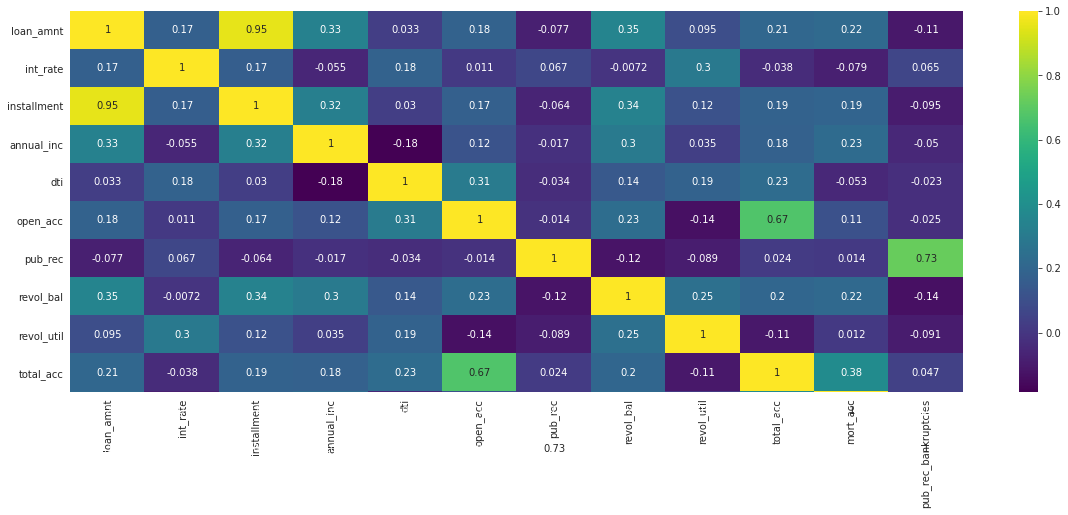

In [21]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

For The EDA, we will explore rlationships between features that have considerable correlations. 

1. There is a perfect correlation between installment and loan_amount. lets check for the relationship in detail using scatterplot
2. Total_acc to open_acc
3. total_acc to mort_acc
4. pub_rec to pub_rec_bankcruptcies


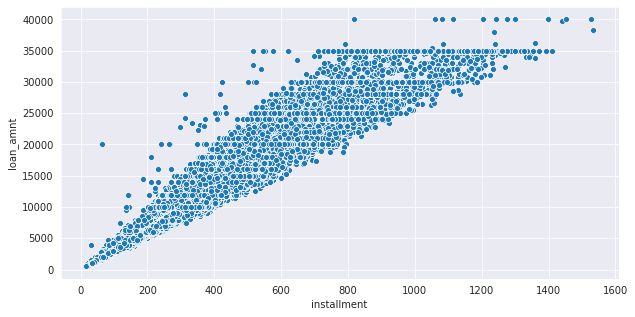

In [24]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

can see a linear relationship above. 

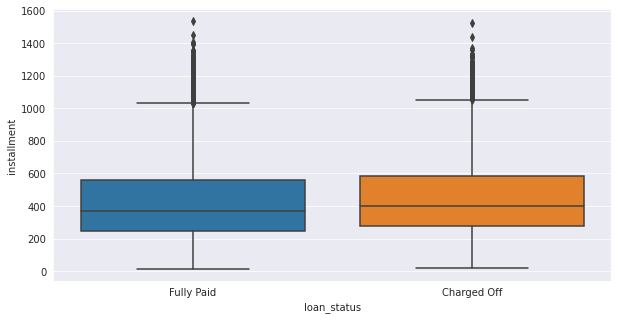

In [29]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'loan_status', y = 'installment', data = df)

In [30]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5514.0,453.105470,247.777086,21.62,276.9675,400.240,586.2925,1527.00
Fully Paid,22810.0,426.400326,249.797974,16.31,246.1475,370.015,560.9100,1533.81


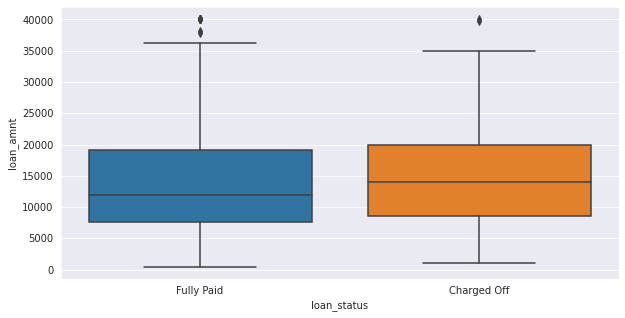

In [26]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

There is not much relation between the two categories for loan_amount, just the charged off mean loan is slightly higher than the fully paid which is logical

lets check how much the amount is affecting the status

In [28]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5514.0,15147.048422,8474.369148,1000.0,8506.25,14000.0,20000.0,40000.0
Fully Paid,22810.0,13840.493205,8278.569531,500.0,7550.00,12000.0,19150.0,40000.0


Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [36]:
grades = sorted(df['grade'].unique())

In [37]:
sub_grade =sorted(df['sub_grade'].unique())

lets check relationship of grades with loan status

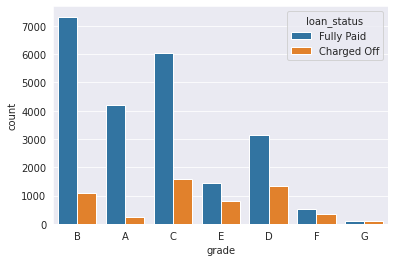

In [42]:
sns.countplot(x = 'grade', hue = 'loan_status', data = df)

Based on grades, we can conclude the charged off ratio increases with grades

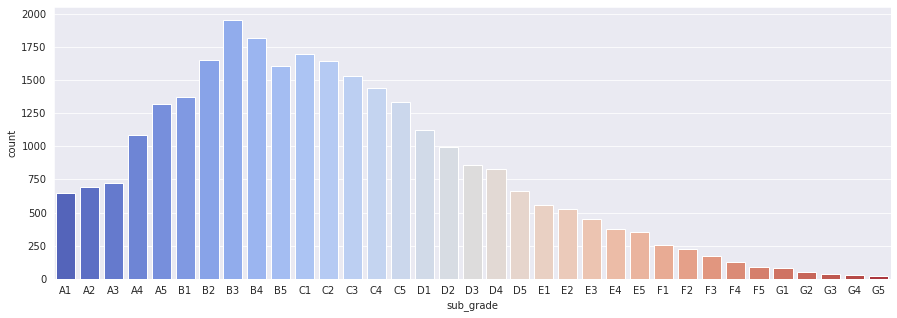

In [46]:
#Checking counts per subgrade
plt.figure(figsize= (15,5))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df, order = sub_grade_order, palette='coolwarm')

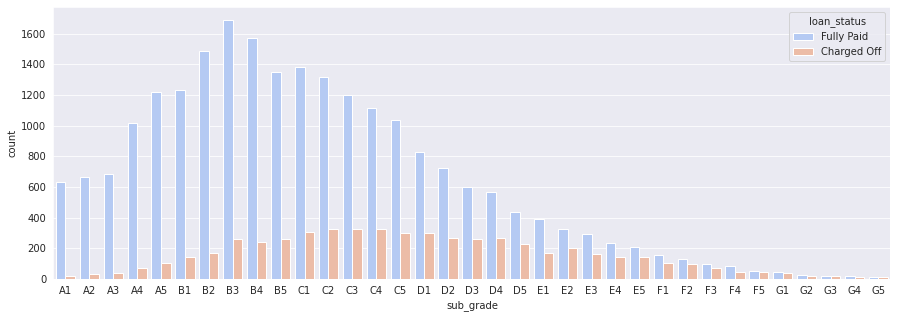

In [47]:
#Checking charged off and fully paid counts per subgrade
plt.figure(figsize= (15,5))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df,hue = 'loan_status', order = sub_grade_order, palette='coolwarm')

It looks like F and G subgrades don't get paid back that often. Checking for only those two subgrades

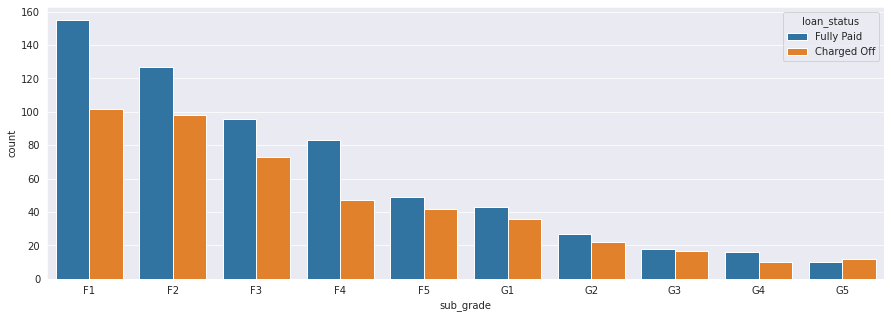

In [53]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize= (15,5))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = f_and_g , hue = 'loan_status', order = subgrade_order)


Lets Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [54]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1 , 'Charged Off': 0})

In [56]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1.0,Fully Paid
1,1.0,Fully Paid
2,1.0,Fully Paid
3,1.0,Fully Paid
4,0.0,Charged Off
...,...,...
28320,1.0,Fully Paid
28321,1.0,Fully Paid
28322,0.0,Charged Off
28323,1.0,Fully Paid


In [57]:
df['loan_repaid1'] = df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

In [61]:
df = df.drop('loan_repaid1', axis = 1)

Lets create a bar plot showing the correlation of the numeric features to the new loan_repaid column.

In [66]:
loan_corr = df.corr()['loan_repaid'].sort_values().drop('loan_repaid')

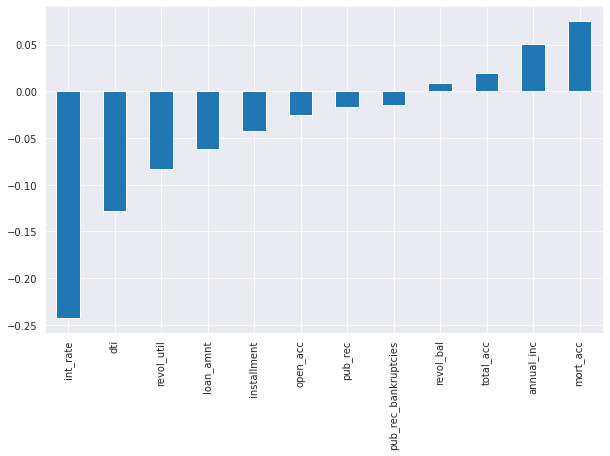

In [68]:
plt.figure(figsize= (10,6))
loan_corr.plot(kind = 'bar')

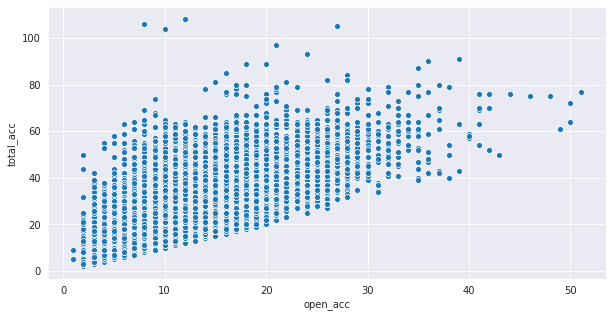

In [70]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'open_acc', y = 'total_acc', data = df)